# 2 -  Patterns in Data


## Our amazing brains


Have you ever stopped to think about how your brain processes the world around you? When you are scrolling through YouTube and see a video thumbnail of a cat, **how is it that your brain is able to tell almost instantly  that this is a cat and not a dog**? It's a question so simple that we rarely even consider it, but today I want to break down that series of events... 

![cat](images/cat.jpg)

### How to recognise a cat


1. A picture of a cat, which is made up of trillions of light photons of varying colors and intensities, leave your phone screen. 
2. This light information travels through the air and enters you eyes. 
3. The light lands in the back of your eyes, in the shape of a cat, and triggers certain nerve cells to send electrical impulses to your brain. 
4. These electrical impulses come in a very specific cat-like *pattern*, made up of lots of smaller sub-patterns such as whiskers, fur and big eyes. 
5. Your brain begins to process these patterns, triggering memories of other things which had similar features. 
6. Your brain collects all this evidence together and decides **this is probably a cat**


The whole process happens so fast *you don't even notice*. It's actually a miracle when you think about it! Our brains are unbelievably adept at making sense of huge amounts of information very fast. A typical picture might have over a million pixels. Each pixel can be thought of as a number: one tiny piece of information. Our brain can decode all of those pieces of information *instantly*. In fact, the picture above is $1280 \times 720 = 921,600$ pixels in size. Each pixel is made up of three colors (red, green and blue). This gives a total of $2,764,800$ pieces of information! And yet you are able to decode this, and recognise that it is a cat immediately. 

![](images/three_d_array.png)


## Data science: discovering patterns in data


OK, so our brains are amazingly intelligent, but what does this have to do with data science? Well, one way to summarise the goal of data science is 

> *Data science is a collection of techniques and algorithms that aim to make sense of data by discovering the patterns hidden within it.*

If you're not familiar with the term *algorithm*, it essentially means a set of instructions that we give to a computer. 

![](images/datascience.png)

Clearly, hidden somewhere within all those pieces of pixel data is the idea of a cat. But how do we teach machines to work that out? Well, one possible answer is to give the computer lots of examples of dogs, and lots of examples of cats. Then, using some special algorithms, we can get the computer to *learn* the difference. This is an example of a *classification task* which we will solve using *supervised learning*. 

![](images/cats-dogs.jpg)


But how will the computer 'see' this data? Well, it will know whether it's a dog or a cat, because we have told it. But it will just 'see' the raw pixel data as numbers. Something like this:


| Example Number | Cat or Dog? | Pixel 1 | Pixel 2 | Pixel 3 | Pixel 4 | Pixel 5 | Pixel 6 | Pixel 7 | ...  |
| -------------- | ----------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ---  |
| 1              | Cat         | 0.45    | 0.23    | 0.38    | 0.84    | 0.19    | 0.54    | 0.65    | ...  |
| 2              | Dog         | 0.29    | 0.54    | 0.56    | 0.43    | 0.34    | 0.26    | 0.75    | ...  |
| 3              | Dog         | 0.45    | 0.36    | 0.74    | 0.36    | 0.96    | 0.51    | 0.19    | ...  |
| 4              | Cat         | 0.74    | 0.72    | 0.23    | 0.63    | 0.07    | 0.12    | 0.20    | ...  |
| $\vdots$       | $\vdots$    |$\vdots$ | $\vdots$| $\vdots$| $\vdots$| $\vdots$| $\vdots$| $\vdots$| |



The task of finding the pattern of 'cat' vs 'dog' inside pixel data is **hard**. Indeed, it might seem *impossible* at first. This is an example of a very complicated pattern. We will get there, but first we will consider some much simpler patterns. 

# Learning simple patterns

Let's first consider some simpler data we could feed our computer to see if it can tell the difference between dogs and cats. Let's say we collect a sample of cats and dogs and measure their tail length along with their weight. So, we end up with a table that looks something like this




| Example number | Cat or dog? | Weight (kg) | Tail length (cm) |
| -------------- | ----------- | ----------- | ---------------- |
| 1              | Cat         | 6.6         | 43               |
| 2              | Dog         | 32          | 31               |
| 3              | Dog         | 41          | 56               |
| 4              | Cat         | 4.5         | 46               |
| $\vdots$       | $\vdots$    | $\vdots$    | $\vdots$         |



So, this table is a lot simpler and easier to interpret than the one before. But in essence, it's no different. We can plot this data on a graph to get a visual picture of what's going on. For each example, we can plot a point where it's x-value is the weight, and the y-value is the tail length. We can then colour the point based on whether it's a dog or a cat. 

Run the python cells below and take a look at the graph that's produced. You will see an example of a simple pattern. What do you notice?


In [1]:
# RUN ME :P

import matplotlib.pyplot as plt
import numpy as np
from my_scripts.lesson2 import make_graph_1

%matplotlib notebook

<IPython.core.display.Javascript object>


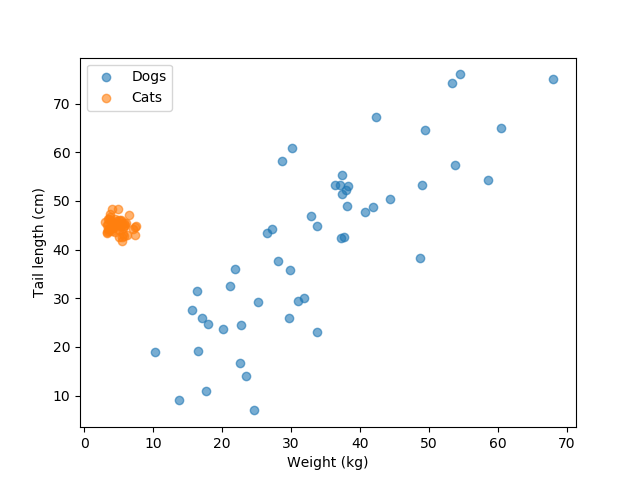

In [2]:
# NOW RUN THIS CELL TO MAKE THE GRAPH! 
%matplotlib notebook

make_graph_1()

## Our first learning algorithm: 5-Nearest Neighbours


We can sate the learning task as this:

> *Given a new animal, where we have measured its weight and tail length, can we predict whether this is a dog or a cat?*
 
The 5-Nearest Neighbours algorithm is an example of a simple learning algorithm that can help us answer that question. Say we have collected all our data and we want to guess whether a new measurement is a dog or a cat. The 5-nearest neighbors algorithm makes a prediction as follows:

1. Plot all the data you have collected on a graph, like the one above. 
2. Take the new point, and plot this on the graph also. 
3. Compare the distance between the new point and all the data points you have collected. 
4. Take the 5 nearest points. 
5. If more of these points are dogs, predict that the new point is a dog. If more of these points are cats, predict that the new point is a cat. 


Have a run of the cells below and try to get a rough idea of what this algorithm is doing. 



<IPython.core.display.Javascript object>


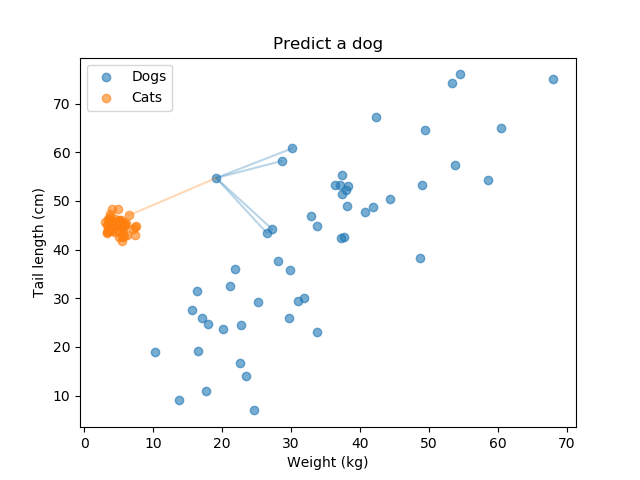

interactive(children=(FloatSlider(value=22.0, description='weight', max=70.0, step=0.01), Output()), _dom_clas…

interactive(children=(FloatSlider(value=55.0, description='tail', max=70.0, min=10.0, step=0.01), Output()), _…

In [3]:
from my_scripts.lesson2 import  make_graph_2
make_graph_2()

## Calculating the distance between points

In order to make this algorithm work, we need to be able to calculate the distance between points. For this, we will need the Pythagorus theorem. 

![](images/pythag.png)

This tells us about how to find the length of the long side on a right-angled triangle given the length of the other two sides. If the two shorter sides of the triangle have length $a$a and $b$, then the longer length $c$ is given by

$$
c^2 = a^2 + b^2
$$

That means that 

$$
c = \sqrt{a^2 + b^2}
$$

What if we have two points given by 

$$
(x_1, y_1), \quad (x_2, y_2)
$$

What is the distance between these two points? Well, their $x$-separation is $x_2 - x_1$ and their $y$-separation is $y_2 - y_1$. Therefore, the distance between these two points is given by 

$$
\text{distance} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

Take a look at the graph below to verify to yourself that this makes sense. 

<IPython.core.display.Javascript object>


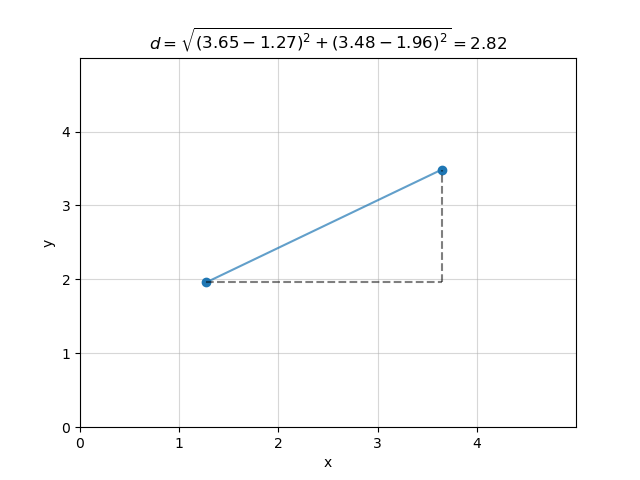

interactive(children=(FloatSlider(value=1.5, description='x1', max=5.0, step=0.001), Output()), _dom_classes=(…

interactive(children=(FloatSlider(value=1.5, description='y1', max=5.0, step=0.001), Output()), _dom_classes=(…

interactive(children=(FloatSlider(value=3.5, description='x2', max=5.0, step=0.001), Output()), _dom_classes=(…

interactive(children=(FloatSlider(value=3.5, description='y2', max=5.0, step=0.001), Output()), _dom_classes=(…

In [6]:
from my_scripts.lesson2 import  make_graph_3
make_graph_3()


## Exercise 1

Write a function called `distance` that takes in four arguments `x1, y1, x2, y2` and finds the distance between the two points: `(x1, y1)` and `(x2, y2)`

> HINT 1: You will need to use a square root to calculate this! You can calculate the square root of a number by using `np.sqrt(n)` where `n` is the number you want to find the square root of.

> HINT 2: You will also need to square a number! This can be done by using the `**` notation, for example, to calculate 5 squared would be written as `5 ** 2`. 

> HINT 3: Remember to use brackets where necessary!

As a reminder, here's an example of a simple function that adds two numbers.If you need more practice, you can always go back and take a look at the lesson on functions and loops. 


```python 
def add(a, b):
    answer = a + b
    return answer
```

Test your function by running the cell below it.

In [11]:
# write your function below, and then run this cell

def distance(x1, y1, x2, y2):
    
    # your code here! 
    
    return 

In [12]:
# Run this to test your code

from my_scripts.lesson2 import test_exercise_1
test_exercise_1(distance)

Unfortunately there is a problem with your function :'( Try taking another look. 
 Things to try: 
1. Is your function returning anything? 
2. Have you indented your function properly? Make sure it looks similar to the example above 
3. Have you used brackets correctly? 


The next step in the algorithm is to calculate the distance between the point we want to predict and all of the other points we have collected. Below you will see a list of lists, which holds our data. Each mini-list holds the weight, tail length and animal type of an individual in our labeled data set. The first item gives the weight, the second gives the tail length. The third position shows whether this individual is a dog or a cat. In this case, and 1 indicates a dog and a 0 indicates c cat. Below that, I have written a function that will predict whether a new point is a dog or a cat given the collected data. See if you can follow along!

In [15]:
data = [[58.51, 54.27,  1],
        [37.31, 42.38,  1],
        [ 3.04, 45.72,  0],
        [60.38, 64.95,  1],
        [ 3.70, 44.10,  0],
        [ 5.46, 45.34,  0],
        [21.85, 36.01,  1],
        [31.02, 29.46,  1],
        [42.31, 67.25,  1],
        [ 5.81, 42.68,  0],
        [ 4.97, 45.09,  0],
        [37.45, 55.26,  1],
        [ 3.48, 45.23,  0],
        [ 3.81, 44.64,  0]]


def predict(new_weight, new_tail_length):
    
    distances = []
    animals = []
    
    for individual in data:
        
        weight = individual[0]
        tail_length = individual[1]
        animal = individual[2]
        
        d = distance(weight, tail_length, new_weight, new_tail_length)
        
        distances.append(d)
        animals.append(animal)
        
    nearest5 = np.argsort(distances)[:5]
    
    count = 0
    for index in nearest5:
        count = count + animals[index]
    
    if count < 2.5:
        return 'Cat'
    else:
        return 'Dog'
        


In [17]:
predict(3, 26)

In [ ]:
predict(32, 60)

## Exercise 2

Use the function that's been created for you to predict whether the following examples are dogs or cats



| Example number | Animal weight (kg) | Animal tail length (cm) |
| -------------- | ------------------ | ----------------------- |
| 1              | 5.5                | 42                      |
| 2              | 12                 | 35                      |
| 3              | 41                 | 48                      |
| 4              | 10                 | 47                      |
| 5              | 25                 | 60                      |





In [ ]:
# your code here

## Extending to more dimensions

What if, in addition to weight and tail length we also had another measurement along with each animal in our data set, say paw width. Now our data table looks something like this

| Example number | Cat or dog? | Weight (kg) | Tail length (cm) | Paw width (mm) |
| -------------- | ----------- | ----------- | ---------------- | -------------- |
| 1              | Cat         | 6.6         | 43               | 18             |
| 2              | Dog         | 32          | 31               | 26             |
| 3              | Dog         | 41          | 56               | 34             |
| 4              | Cat         | 4.5         | 46               | 23             |
| $\vdots$       | $\vdots$    | $\vdots$    | $\vdots$         | $\vdots$       |




<IPython.core.display.Javascript object>


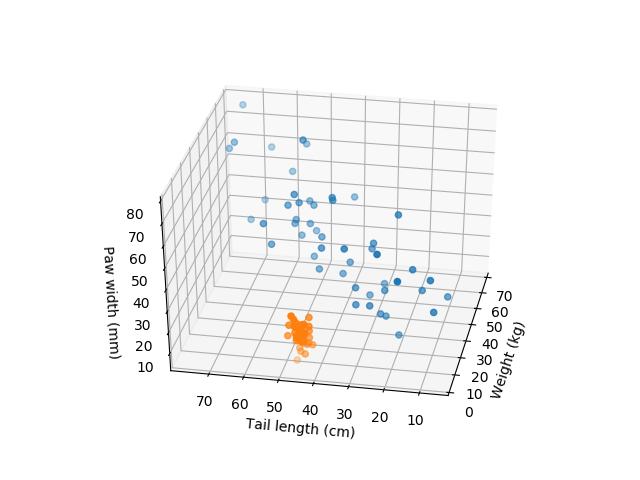

In [18]:
from my_scripts.lesson2 import make_graph_4
make_graph_4()


How would we also include this into our algorithm? Well, the idea is exactly the same. For a new data point, we test the "distance" between this new point and all our old points, except this time  we are looking for a distance in 3D. How do we find the distances between points in 3D? Well, luckily, it's actually only a small extension from the 2D case

![](images/3DPythag.png)

Take a look at this picture. Can you work out the length of the green line? Think about the right angled triangle that's standing up, with the red line making its base. The length of the green line will be the square root of the height squared $(4^2)$ plus the length of the red line squared. But now look at the right angled triangle that's lying flat on the floor. Here, we can see that the red line has a squared length of $9^2 + 2^2$. This means that the length of the green line, $d$ is

$$
\begin{align}
\text{green line length} &= \sqrt{(\text{red line length})^2 + 4^2}  \\[0.3cm]
&= \sqrt{9^2 + 3^2 + 4^2} \\
\end{align}
$$

Let's say we have two points which have coordinates 

$$
(x_1, y_1, z_1), \quad \text{and} \quad (x_2, y_2, z_2)
$$

The distance between these two points in 3D space will be 

$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}
$$

## Exercise 3

Write a new function call;ed `distance3D` that takes in 6 arguments: `x1`, `y1`, `z1`, `x2`, `y2`, `z2`, and returns the distance in 3D between the points defined by `(x1, y1, z1)` and `(x2, y2, z2)`. Test is using the test cell below

In [19]:
def distance3D(x1, y1, z1, x2, y2, z2):
    
    # your code here
    
    return

In [ ]:
# Run this to test your code

from my_scripts.lesson2 import test_exercise_3
test_exercise_3(distance3D)

## Bonus exercise (hard!)

Below you will find a new data block, which is the same as before, except now a new column has been introduced to represent the animal paw width. You will also see my original function for predicting the animal type based of a new measurement based on this data. The name has changed, and I have added a new argument, `new_paw_width`, but the code is identical to before. Your challenge is to make a few small changes to the code so that it will now work with this added dimension. 

In [ ]:
data = [[58.51, 54.27, 67.40,  1],
        [37.31, 42.38, 57.51,  1],
        [ 3.04, 45.72, 18.75,  0],
        [60.38, 64.95, 43.88,  1],
        [ 3.70, 44.10, 20.24,  0],
        [ 5.46, 45.34, 22.46,  0],
        [21.85, 36.01, 63.46,  1],
        [31.02, 29.46, 47.21,  1],
        [42.31, 67.25, 53.54,  1],
        [ 5.81, 42.68, 23.21,  0],
        [ 4.97, 45.09, 12.14,  0],
        [37.45, 55.26, 41.86,  1],
        [ 3.48, 45.23, 18.96,  0],
        [ 3.81, 44.64, 24.40,  0]]


def predict3D(new_weight, new_tail_length, new_paw_width):
    
    # make some changes to this code
    
    distances = []
    animals = []
    
    for individual in data:
        
        weight = individual[0]
        tail_length = individual[1]
        animal = individual[2]
        
        d = distance(weight, tail_length, new_weight, new_tail_length)
        
        distances.append(d)
        animals.append(animal)
        
    nearest5 = np.argsort(distances)[:5]
    
    count = 0
    for index in nearest5:
        count = count + animals[index]
    
    if count < 2.5:
        return 'Cat'
    else:
        return 'Dog'

In [ ]:
# run this cell to test your answer

from my_scripts.lesson2 import test_bonus_exercise
test_bonus_exercise(predict3D)

## That's all folks! :P